In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ixplore import IXPLORE
from ixplore.visualization import plot_overview
from ixplore.utils import transformation_matrix

In [2]:
users = pd.read_csv('../data/synthetic_users.csv', index_col=0)
users

x      y  party color
id                            
0   -0.468 -0.583      0    C0
1   -0.244 -0.432      0    C0
2   -0.346 -0.412      0    C0
3   -0.514 -0.558      0    C0
4   -0.419 -0.586      0    C0
..     ...    ...    ...   ...
245 -0.154  0.210      4    C4
246  0.012 -0.171      4    C4
247 -0.079 -0.067      4    C4
248 -0.203  0.279      4    C4
249  0.270  0.024      4    C4

[250 rows x 4 columns]

In [3]:
reactions = pd.read_csv('../data/likert_reactions.csv', index_col=0)
reactions = reactions/reactions.max().max()
reactions

Q1   Q2   Q3        Q4        Q5        Q6   Q7        Q8  \
id                                                                     
0    0.333333  0.0  1.0  1.000000  0.333333  0.000000  1.0  0.000000   
1    0.666667  0.0  1.0  1.000000  0.333333  0.000000  1.0  0.333333   
2    0.333333  0.0  1.0  1.000000  0.333333  0.000000  1.0  0.000000   
3    0.333333  0.0  1.0  1.000000  0.333333  0.000000  1.0  0.000000   
4    0.333333  0.0  1.0  1.000000  0.333333  0.000000  1.0  0.000000   
..        ...  ...  ...       ...       ...       ...  ...       ...   
245  0.333333  0.0  1.0  0.666667  0.666667  0.333333  1.0  0.666667   
246  0.666667  0.0  1.0  0.666667  0.333333  0.000000  1.0  0.666667   
247  0.666667  0.0  1.0  0.666667  0.666667  0.000000  1.0  0.666667   
248  0.333333  0.0  1.0  0.333333  0.666667  0.333333  1.0  0.666667   
249  0.666667  0.0  1.0  0.666667  0.333333  0.000000  1.0  1.000000   

           Q9  Q10  ...       Q31       Q32       Q33  Q34       Q35  \
id                  ...                                                
0    0.000000  0.0  ...  0.000000  0.333333  1.000000  0.0  0.000000   
1    0.000000  0.0  ...  0.000000  0.333333  1.000000  0.0  0.000000   
2    0.000000  0.0  ...  0.333333  0.333333  1.000000  0.0  0.000000   
3    0.000000  0.0  ...  0.000000  0.333333  1.000000  0.0  0.000000   
4    0.000000  0.0  ...  0.000000  0.333333  1.000000  0.0  0.000000   
..        ...  ...  ...       ...       ...       ...  ...       ...   
245  0.333333  0.0  ...  0.666667  1.000000  0.333333  0.0  0.333333   
246  0.000000  0.0  ...  0.333333  0.666667  0.666667  0.0  0.000000   
247  0.000000  0.0  ...  0.333333  0.666667  0.666667  0.0  0.000000   
248  0.333333  0.0  ...  0.666667  1.000000  0.333333  0.0  0.333333   
249  0.333333  0.0  ...  0.333333  1.000000  0.666667  0.0  0.333333   

          Q36       Q37       Q38       Q39       Q40  
id                                                     
0    0.333333  0.333333  0.000000  1.000000  0.333333  
1    0.333333  0.333333  0.333333  0.666667  0.666667  
2    0.333333  0.333333  0.333333  0.666667  0.666667  
3    0.333333  0.333333  0.000000  1.000000  0.333333  
4    0.333333  0.333333  0.000000  1.000000  0.333333  
..        ...       ...       ...       ...       ...  
245  0.333333  0.000000  1.000000  0.666667  1.000000  
246  0.333333  0.000000  1.000000  0.333333  1.000000  
247  0.333333  0.000000  1.000000  0.666667  1.000000  
248  0.000000  0.000000  1.000000  0.666667  1.000000  
249  0.333333  0.000000  1.000000  0.333333  1.000000  

[250 rows x 40 columns]

### Random initialization

In [4]:
xplore = IXPLORE(reactions, pca_initialization=False, random_state=17)


2026-02-13 11:28:07,021 - ixplore - INFO - Number of users for model: 250
2026-02-13 11:28:07,022 - ixplore - INFO - Number of items: 40
2026-02-13 11:28:07,023 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 11:28:07,024 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 11:28:07,028 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 11:28:07,028 - ixplore - INFO - Random state set to 17
2026-02-13 11:28:07,029 - ixplore - INFO - Initialized embedding with random values.
2026-02-13 11:28:07,093 - ixplore - INFO - Fitted model parameters from embedding.


2026-02-13 08:57:41,066 - ixplore - INFO - MAE: 0.2708816247817641, ACC: 0.7045


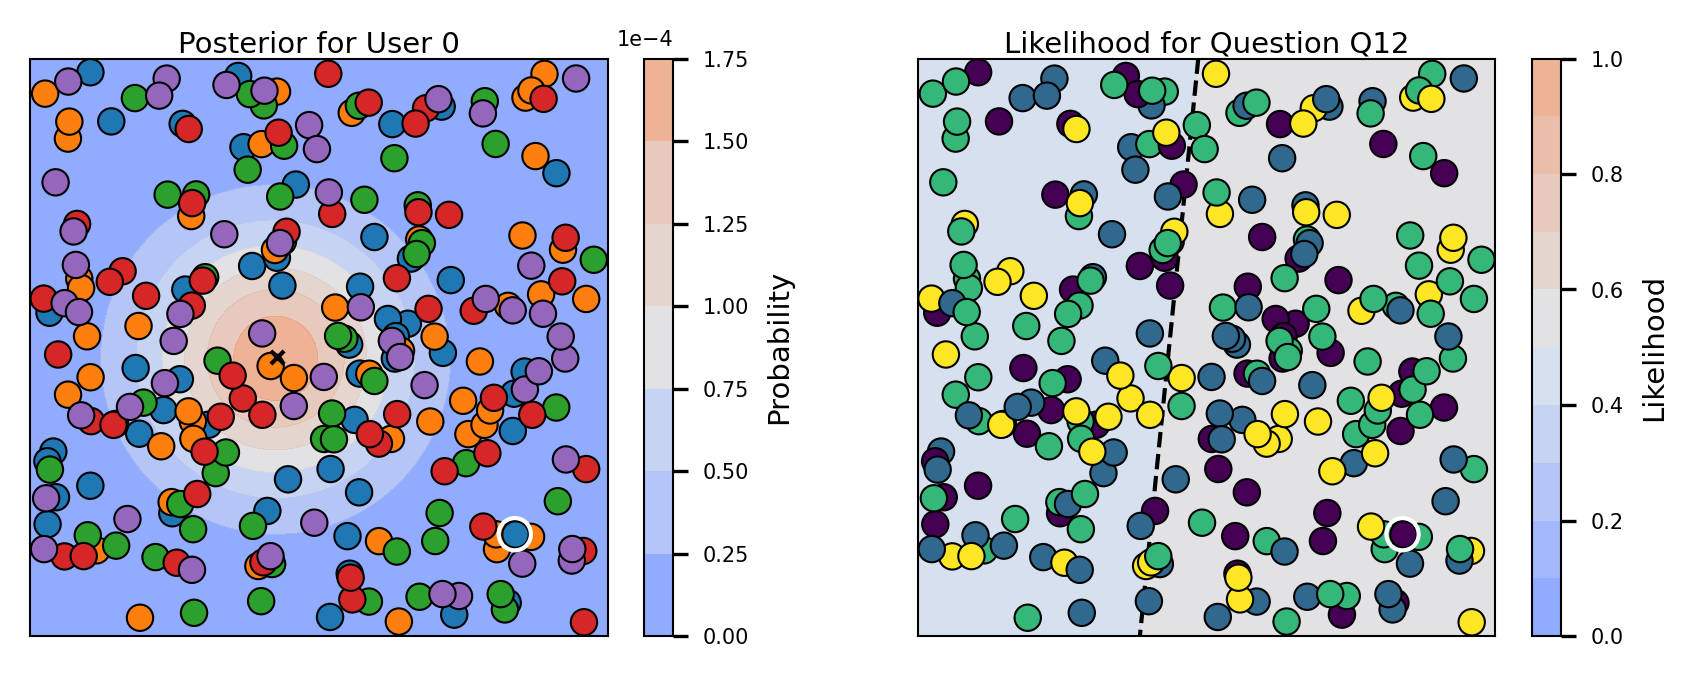

In [5]:
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:42,552 - ixplore - INFO - MAE: 0.2685002496404565, ACC: 0.7189


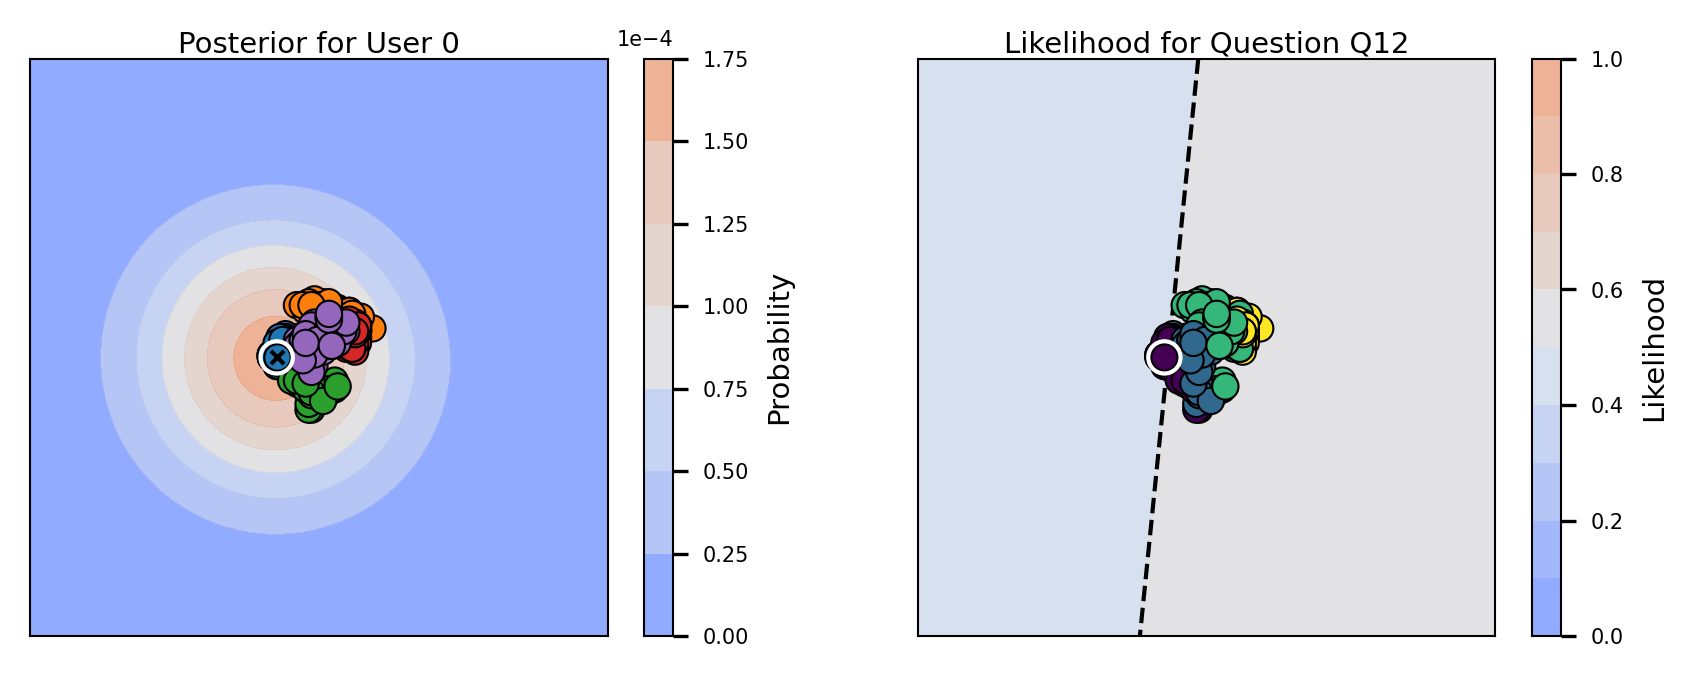

In [6]:
xplore.fit_posteriors()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:42,766 - ixplore - INFO - MAE: 0.2585436923749154, ACC: 0.7417


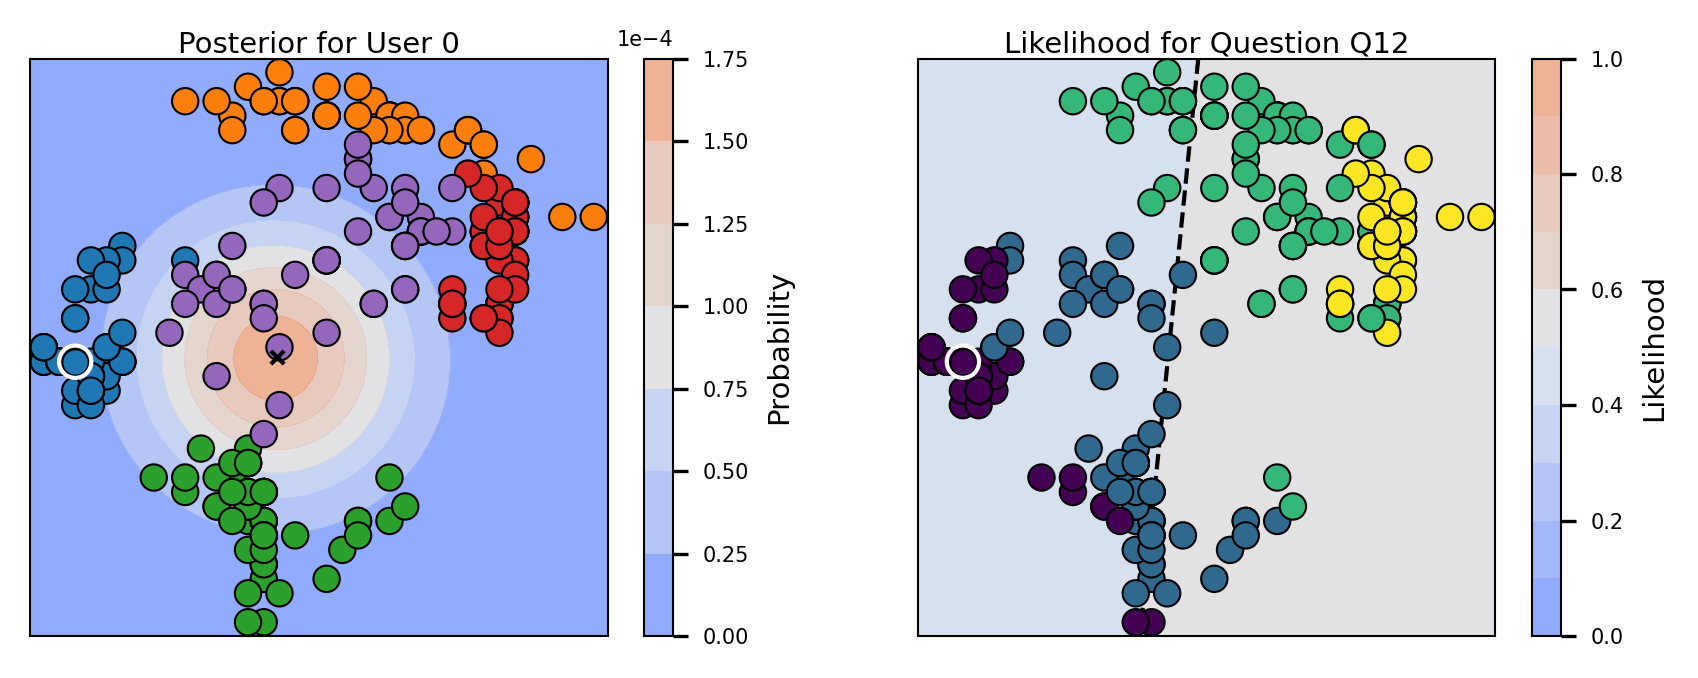

In [7]:
xplore.normalize_embedding()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

In [8]:
xplore.fit_models()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:43,061 - ixplore - INFO - MAE: 0.10071268692733135, ACC: 0.9389


2026-02-13 08:57:44,474 - ixplore - INFO - MAE: 0.08973356167216694, ACC: 0.9609


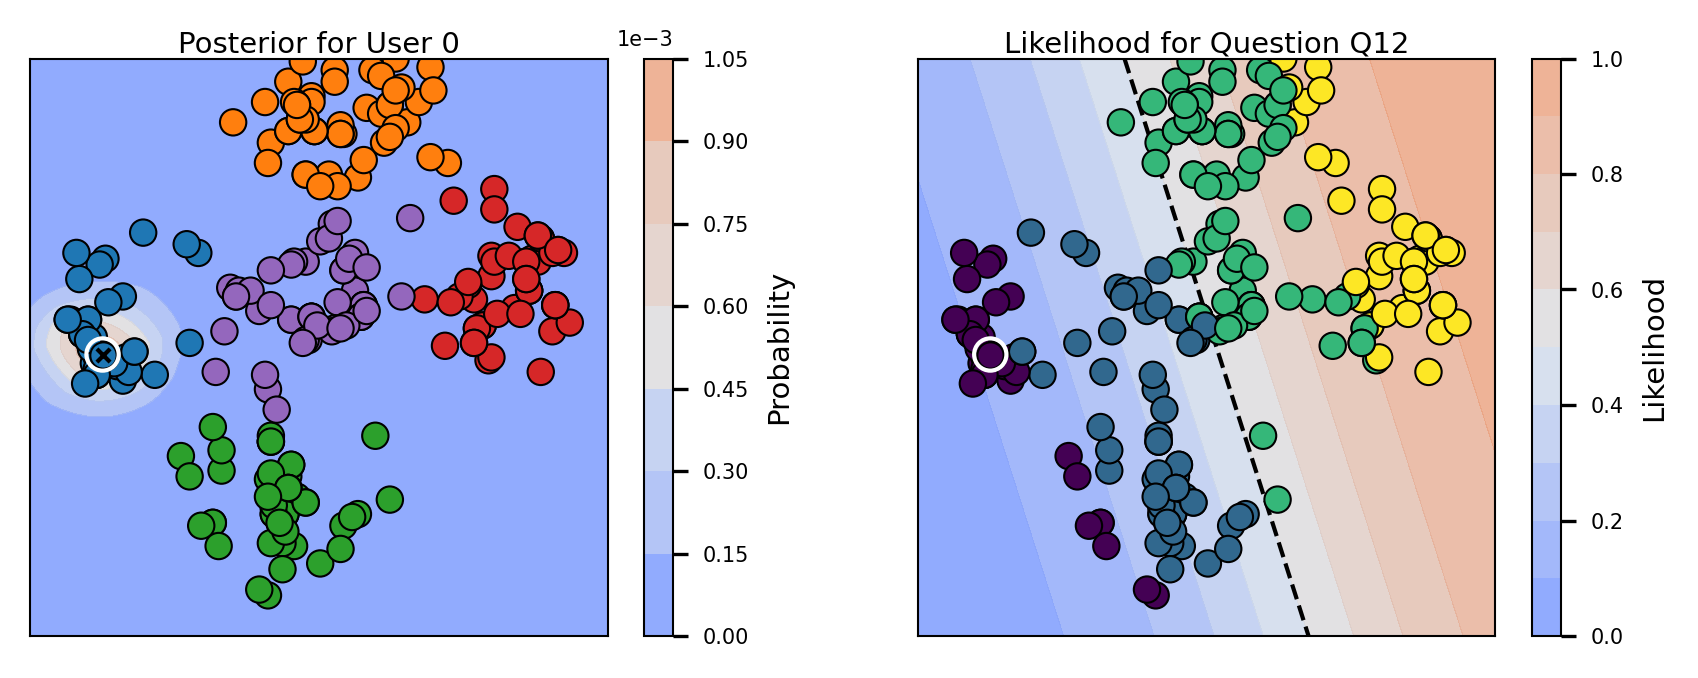

In [9]:
xplore.fit_posteriors()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:44,703 - ixplore - INFO - MAE: 0.09034252909290151, ACC: 0.9571


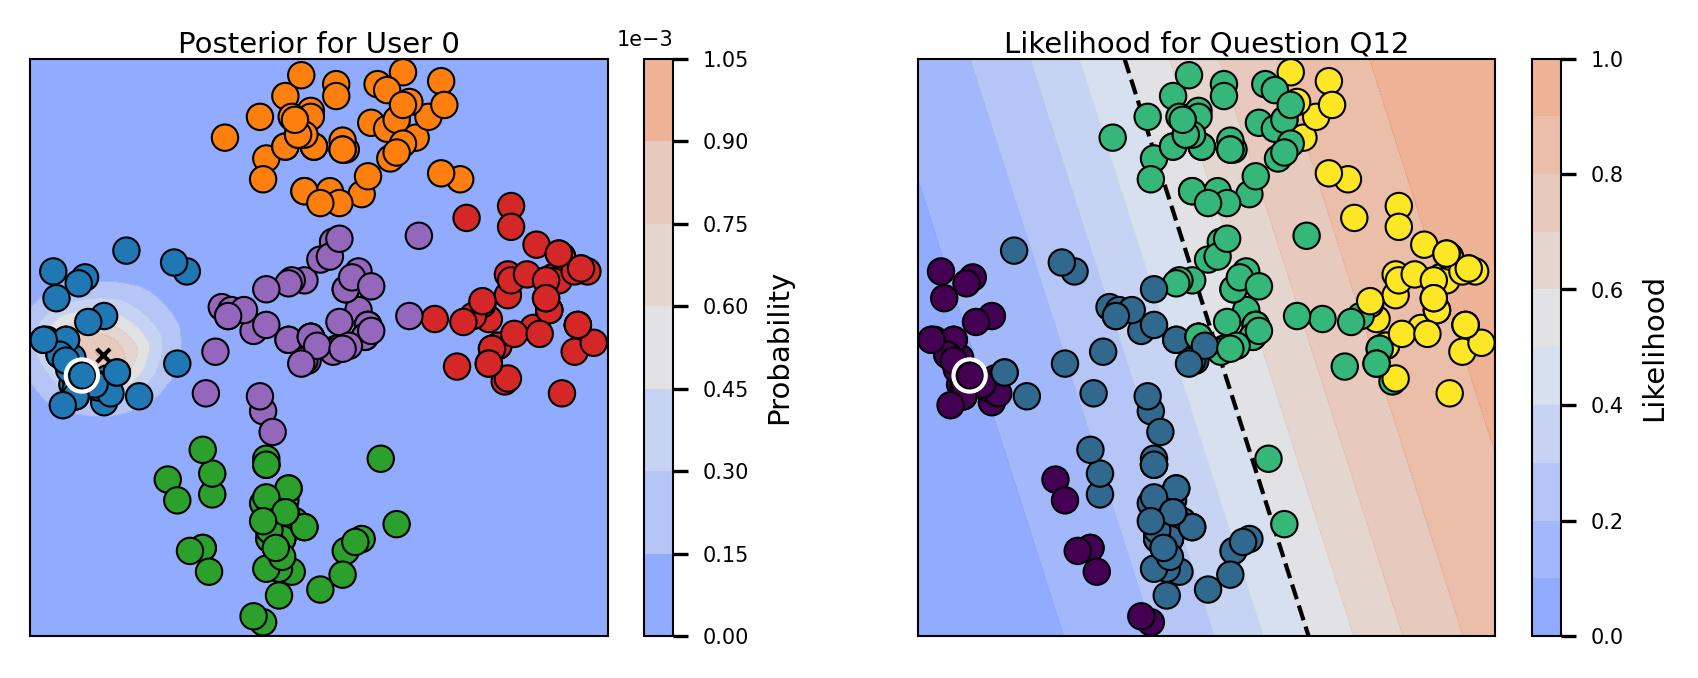

In [10]:
xplore.normalize_embedding()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

In [11]:
xplore.fit_models()
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:45,002 - ixplore - INFO - MAE: 0.07955994518109108, ACC: 0.972


2026-02-13 08:57:45,297 - ixplore - INFO - MAE: 0.07606318981569962, ACC: 0.9677


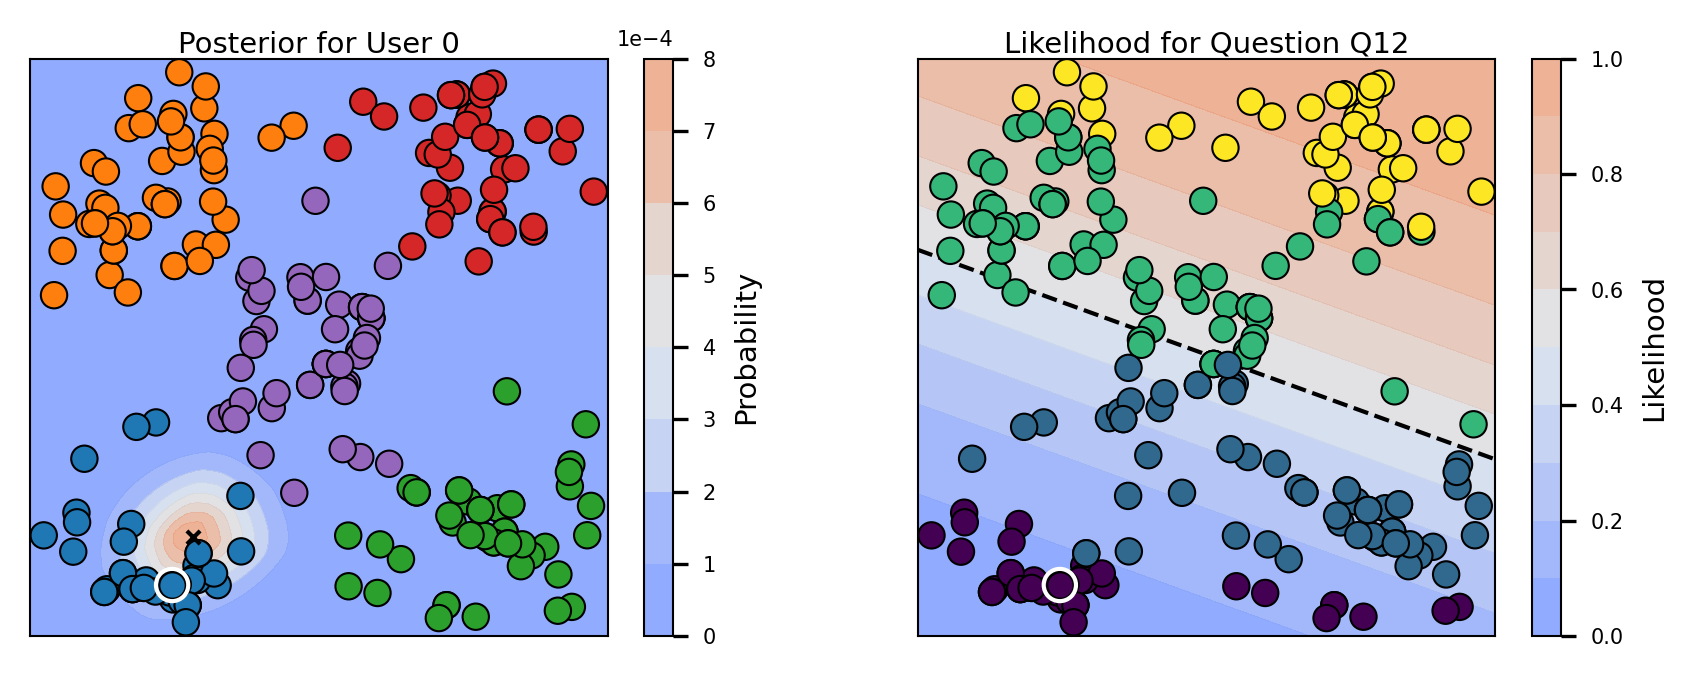

In [12]:
M = transformation_matrix(rotation=50, scale=(1.1, 1), order=('shear', 'rotate', 'scale'))
xplore.transform_embedding(M)
plot_overview(xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

### Load with Transformation

In [13]:
transformed_xplore = IXPLORE(reactions, pca_initialization=False, random_state=17, transformation=M)
transformed_xplore.iterate(n_iterations=2)
transformed_xplore.normalize_embedding()
plot_overview(transformed_xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))

2026-02-13 08:57:45,482 - ixplore - INFO - Number of users for model: 250
2026-02-13 08:57:45,482 - ixplore - INFO - Number of items: 40
2026-02-13 08:57:45,483 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 08:57:45,484 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 08:57:45,487 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 08:57:45,487 - ixplore - INFO - Random state set to 17
2026-02-13 08:57:45,487 - ixplore - INFO - Initialized embedding with random values.
2026-02-13 08:57:45,542 - ixplore - INFO - Fitted model parameters from embedding.
2026-02-13 08:57:45,542 - ixplore - INFO - Iteration 1/2
2026-02-13 08:57:46,733 - ixplore - INFO - Fit MAE: 0.0951, Fit accuracy: 0.9447
2026-02-13 08:57:46,734 - ixplore - INFO - Iteration 2/2
2026-02-13 08:57:47,978 - ixplore - INFO - Fit MAE: 0.0747, Fit accuracy: 0.9732
2026-02-13 08:57:48,026 - ixplore - INFO - MAE: 0.07472206842555677, ACC

### Initialize with PCA

In [14]:
pca_xplore = IXPLORE(reactions, pca_initialization=True, random_state=17)


2026-02-13 08:57:48,207 - ixplore - INFO - Number of users for model: 250
2026-02-13 08:57:48,208 - ixplore - INFO - Number of items: 40
2026-02-13 08:57:48,208 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 08:57:48,209 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 08:57:48,225 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 08:57:48,225 - ixplore - INFO - Random state set to 17
2026-02-13 08:57:48,230 - ixplore - INFO - Initialized embedding with PCA.
2026-02-13 08:57:48,292 - ixplore - INFO - Fitted model parameters from embedding.


2026-02-13 08:57:48,345 - ixplore - INFO - MAE: 0.07300346705380255, ACC: 0.9769


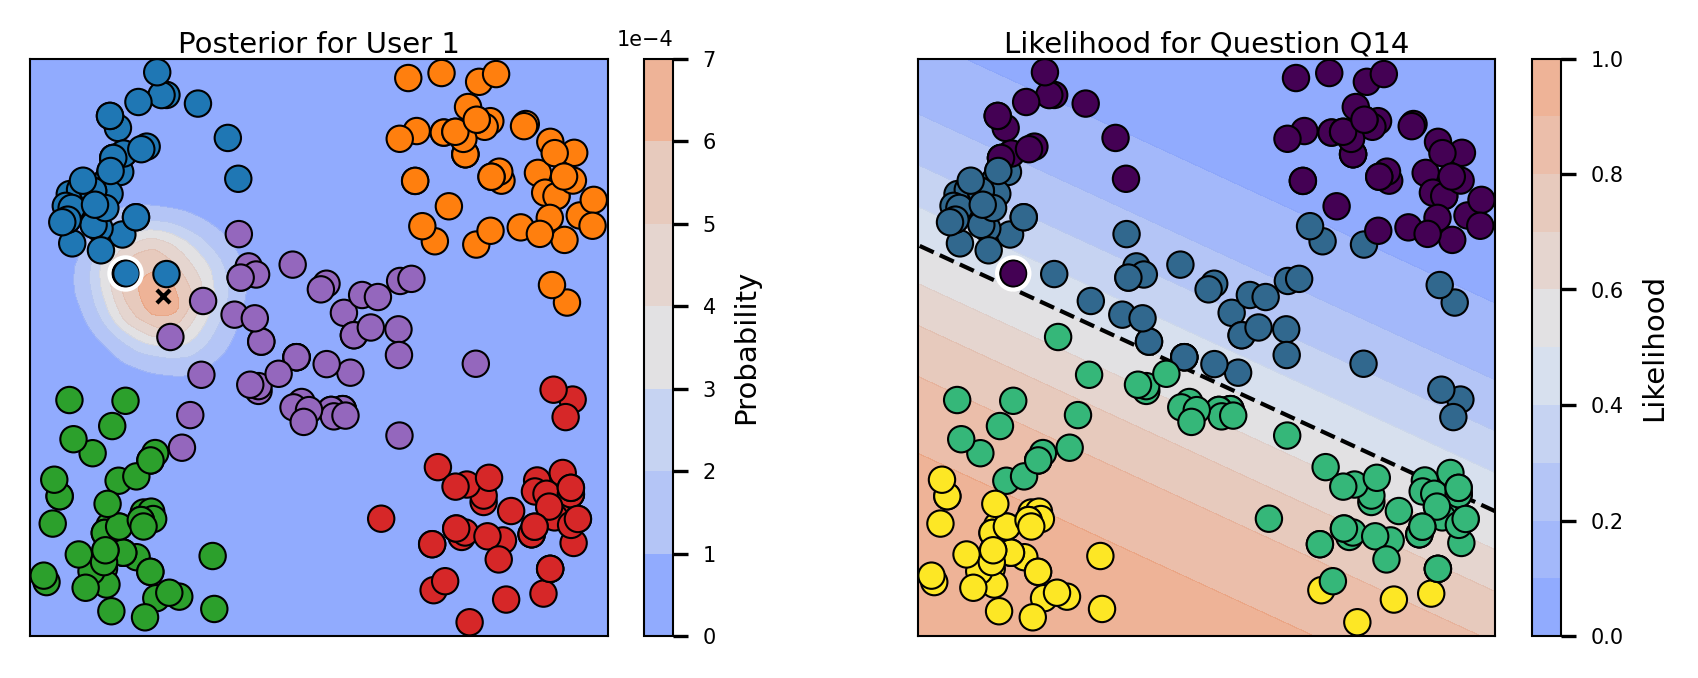

In [15]:
plot_overview(pca_xplore, n=1, q='Q14', colors=users.color, figsize=(7,2.5))
path = '../data/synthetic_embedding.csv'
pca_xplore.get_embedding().to_csv(path)

In [16]:
xplore.fit_posteriors()


### Pretrained Embedding

2026-02-13 08:57:49,706 - ixplore - INFO - Number of users for model: 250
2026-02-13 08:57:49,706 - ixplore - INFO - Number of items: 40
2026-02-13 08:57:49,707 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 08:57:49,708 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 08:57:49,711 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 08:57:49,711 - ixplore - INFO - Random state set to 0
2026-02-13 08:57:49,713 - ixplore - INFO - Pretrained embedding loaded from ../data/synthetic_embedding.csv
2026-02-13 08:57:49,713 - ixplore - INFO - Used pretrained embedding.
2026-02-13 08:57:49,801 - ixplore - INFO - Fitted model parameters from embedding.
2026-02-13 08:57:49,851 - ixplore - INFO - MAE: 0.07300346705380255, ACC: 0.9769


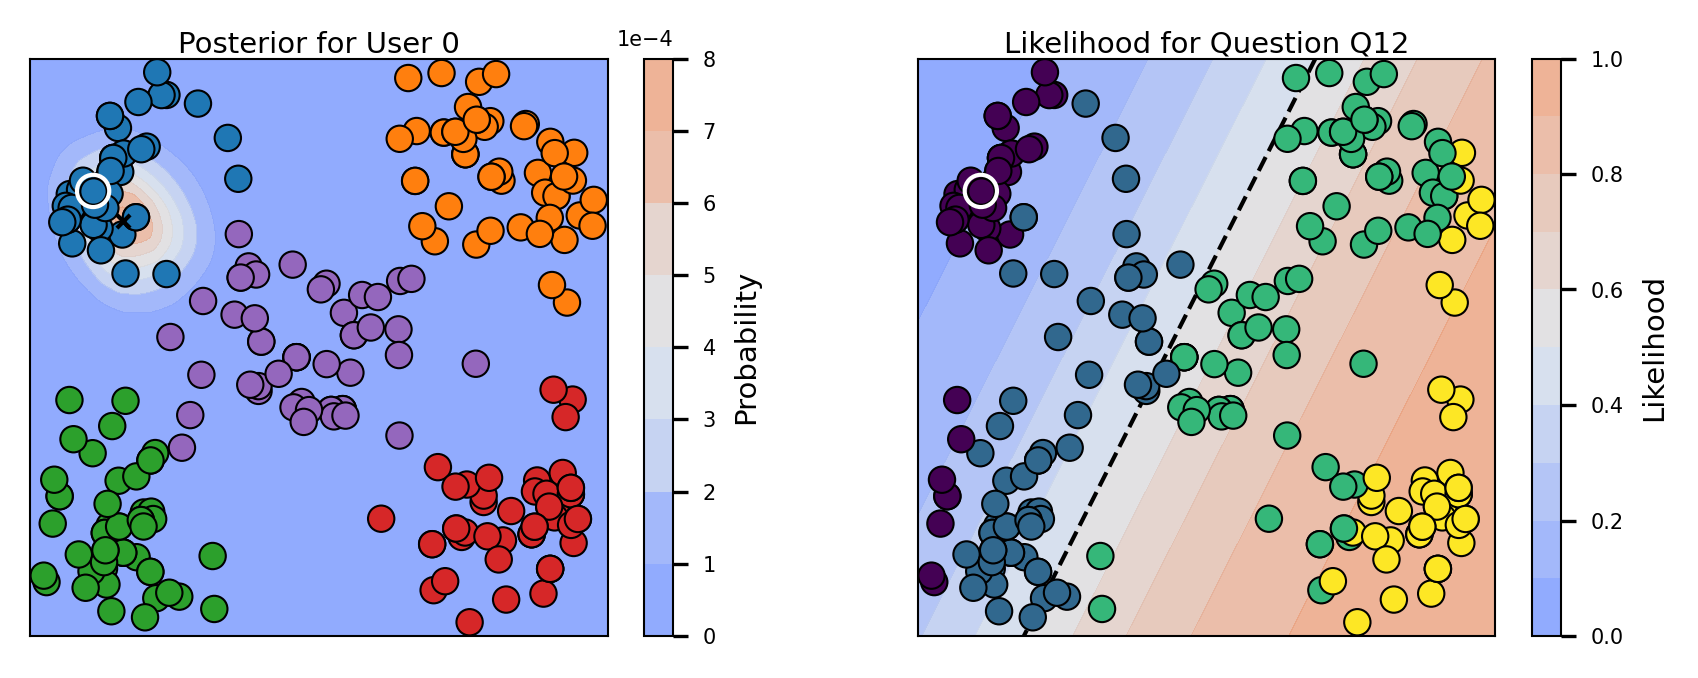

In [17]:
loaded_xplore = IXPLORE(reactions, pretrained_embedding=path)
plot_overview(pca_xplore, n=0, q='Q12', colors=users.color, figsize=(7,2.5))